In [1]:
#Part-1: Gathering the data

In [2]:
#Importing the necessary librabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
%matplotlib inline

In [3]:
#Loading the twitter archive data first
twitter_archive_data = pd.read_csv(r"twitter-archive-enhanced.csv")

In [4]:
#Preview of the archive data
twitter_archive_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
#Loading the 2nd dataset, i.e. image predictions
website = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_data = requests.get(website, allow_redirects=True)

In [6]:
#loading image_prediction dataset
open('image_predictions.tsv', 'wb').write(image_data.content)
image_predictions_data = pd.read_csv("image_predictions.tsv", sep='\t')

In [7]:
#Preview of the Image predictions dataset
image_predictions_data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
#Libraries for extracting data from Twitter using tweet IDs 
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [8]:
# Querying Twitter API for each tweet in the Twitter archive and saving the JSON in a text file
# The below keys are hidden to comply with Twitter's API terms and conditions
# Udacity has also asked to hide the keys
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df_1.tweet_id.values
len(tweet_ids)

In [10]:
# Using the tweet IDs in the Twitter archive data to query Twitter's API for JSON data 
count = 0
fails_dict = {}
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [11]:
#Loading the Twitter API data from tweet-json.txt 
with open(r'tweet-json.txt') as text:
    new_tweets_columns = pd.DataFrame(columns = ['tweet_id','favorites','retweets'])
    
    for i in text:
        line = json.loads(i)
        data = {'tweet_id': line['id'],'favorites': line['favorite_count'],
                                      'retweets': line['retweet_count']}
        
        new_tweets_columns = new_tweets_columns.append(data, ignore_index=True)
new_tweets_columns.head(10)

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198849,32467,7711


In [12]:
#Part-2: Assessing Data 

In [13]:
#Visually assessing the twitter archive data
twitter_archive_data.head(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [14]:
#Assessing the twitter archive data programmatically
twitter_archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
#Looking at the shape of the data
twitter_archive_data.shape

(2356, 17)

In [16]:
twitter_archive_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
twitter_archive_data.head(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [18]:
twitter_archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [19]:
#Visually assessing the prediction data
image_predictions_data.head(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [20]:
#Looking at the shape of the data
image_predictions_data.shape

(2075, 12)

In [21]:
image_predictions_data['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [22]:
#Assessing the jpg_url duplicate values (There are many duplicates)
image_predictions_data['jpg_url'].value_counts()

https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg    2
https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg    2
https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg    2
https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg    2
https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg    2
                                                  ..
https://pbs.twimg.com/media/ChaXmuAXEAE66KP.jpg    1
https://pbs.twimg.com/media/CUoLEG3XAAE65I0.jpg    1
https://pbs.twimg.com/media/ChvAQuMWMAAVaKD.jpg    1
https://pbs.twimg.com/media/CU8IY0pWIAA2AJ-.jpg    1
https://pbs.twimg.com/media/CVz7FxXWUAAlTRP.jpg    1
Name: jpg_url, Length: 2009, dtype: int64

In [23]:
#Assessing the image predictions data programmatically
image_predictions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
image_predictions_data.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [25]:
#Visually assessing the new tweets data
new_tweets_columns.head(15)

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198849,32467,7711


In [26]:
#Looking at the shape of the data
new_tweets_columns.shape

(2354, 3)

In [27]:
#Assessing the image predictions data programmatically
new_tweets_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2354 non-null   object
 1   favorites  2354 non-null   object
 2   retweets   2354 non-null   object
dtypes: object(3)
memory usage: 55.3+ KB


In [28]:
new_tweets_columns.describe()

,tweet_id,favorites,retweets
count,2354,2354,2354
unique,2354,2007,1724
top,667495797102141441,0,3652
freq,1,179,5


In [29]:
new_tweets_columns['favorites'].describe()

count     2354
unique    2007
top          0
freq       179
Name: favorites, dtype: int64

In [30]:
new_tweets_columns.describe()

,tweet_id,favorites,retweets
count,2354,2354,2354
unique,2354,2007,1724
top,667495797102141441,0,3652
freq,1,179,5


#### Quality Issue in the datasets:

1. We see that the rating_denominator has a maximum value of 170 and minimum value of 0, but from the problem statement we know that the rating denominator should be 10.

2. We see that the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp has many null values, thus incomplete data.

3. We see that in rating_numerator some values are less than 10, i.e. 0, 9, 7, etc.

4. We see that in the 'name' variable, the name of dogs is sometime written wrongly. For example. 'a', 'such', 'an','not','O','my','his','the' etc.

5. We see that in the column - 'timestamp' the data type is int64, so we can't apply any mathematical operation on the column unless the dtype is changed to datetime format.

6. We also see that the column 'tweet_id' has wrong datatype i.e. int64, it should be string.

7. The column 'rating_numerator' is of int64 datatype, but it should be float as ideally rating can be 14.5 also.

8. There are duplicate values in column jpg_url of image prediction dataset.

#### Tidiness issues

1. In all the 3 loaded datasets, we have a common column (primary key) i.e., Tweet ID. Using this column we can join the 3 datasets into one.

2. We have probabilities values 3 times in predictions dataset, we can take only the highest value of probability out of the three, others can be eliminated.

3. The columns 'doggo', 'floofer', 'pupper', 'puppo' are having lots of 'none' values simultaneously in all 4 columns. Thus, in such cases it becomes redundant to have them. Also, there can be a single column to showcase these 4 categories.

In [31]:
#Part-3: CLEANING THE DATA

In [32]:
# Making copies of the 3 original datasets before cleaning (It's is a best practice)
twitter_archive_data_copy  = twitter_archive_data.copy()
image_predictions_data_copy = image_predictions_data.copy()
new_tweets_columns_copy = new_tweets_columns.copy()

#### Define: 

1. We see that the rating_denominator has a maximum value of 170 and minimum value of 0, but from the problem statement we know that the rating denominator should be 10.

#### Code:

In [33]:
#Cleaning the 1st issue
twitter_archive_data_copy['rating_denominator'].dtype

dtype('int64')

In [34]:
twitter_archive_data_copy['rating_denominator'] = twitter_archive_data_copy['rating_denominator'].replace(twitter_archive_data_copy['rating_denominator'],10)                                                        

#### Test:

In [35]:
#Result now
twitter_archive_data_copy['rating_denominator'].describe()

count    2356.0
mean       10.0
std         0.0
min        10.0
25%        10.0
50%        10.0
75%        10.0
max        10.0
Name: rating_denominator, dtype: float64

#### Define: 

2. We see that the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp has many null values, thus incomplete data. They should be dropped

#### Code:

In [36]:
#Cleaning the 2nd issue
twitter_archive_data_copy = twitter_archive_data_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'],axis=1)

#### Test:

In [37]:
# Result now
twitter_archive_data_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Define: 

3. We see that in rating_numerator some values are less than 10, i.e. 0, 9, 7, etc. Thus we need to make it more than 10.

#### Code:

In [38]:
#Cleaning the 3rd issue
twitter_archive_data_copy['rating_numerator'] = twitter_archive_data_copy['rating_numerator'].map(lambda x : 
                                                                                        twitter_archive_data_copy['rating_numerator'].median() 
                                                                                        if x <= 10
                                                                                        else x)

#### Test:

In [39]:
# Result now
twitter_archive_data_copy['rating_numerator'].value_counts()

11.0      1365
12.0       558
13.0       351
14.0        54
75.0         2
15.0         2
420.0        2
60.0         1
17.0         1
960.0        1
84.0         1
24.0         1
27.0         1
50.0         1
80.0         1
143.0        1
44.0         1
99.0         1
26.0         1
144.0        1
88.0         1
1776.0       1
666.0        1
204.0        1
45.0         1
165.0        1
182.0        1
121.0        1
20.0         1
Name: rating_numerator, dtype: int64

#### Define: 

4. We see that in the 'name' variable, the name of dogs is sometime written wrongly. For example. 'a', 'such', 'an','not','O','my','his','the' etc., let's replace them with 'None'

#### Code:

In [40]:
# Cleaning the 4th Issue
twitter_archive_data_copy['name'] = twitter_archive_data_copy['name'].replace(['a','such','an','not','O','my','his','the','by'],'None')

#### Test:

In [41]:
#Result now
twitter_archive_data_copy['name'].value_counts()

None       822
Charlie     12
Lucy        11
Cooper      11
Oliver      11
          ... 
Marty        1
Grizz        1
Furzey       1
Gunner       1
Harvey       1
Name: name, Length: 948, dtype: int64

#### Define: 

5. We see that in the column - 'timestamp' the data type is int64, so we can't apply any mathematical operation on the column unless the dtype is changed to datetime format.

#### Code:

In [42]:
# Cleaning the 5th issue
twitter_archive_data_copy['timestamp'] = pd.to_datetime(twitter_archive_data_copy['timestamp'])

#### Test:

In [43]:
# Result now
twitter_archive_data_copy['timestamp'].dtype

datetime64[ns, UTC]

#### Define: 

6. We also see that the column 'tweet_id' has wrong datatype i.e. int64, it should be string.

#### Code:

In [44]:
# Cleaning the 6th issue
twitter_archive_data_copy['tweet_id'] = twitter_archive_data_copy['rating_numerator'].astype(str)

#### Test:

In [45]:
# Result now
twitter_archive_data_copy['tweet_id'].dtype

dtype('O')

#### Define: 

7. The column 'rating_numerator' is of int64 datatype, but it should be float as ideally rating can be 14.5 also.

#### Code:

In [46]:
# Cleaning the 7th issue
twitter_archive_data_copy['rating_numerator'] = twitter_archive_data_copy['rating_numerator'].astype(float)

#### Test:

In [47]:
# Result now
twitter_archive_data_copy['rating_numerator'].dtype

dtype('float64')

#### Define: 

8. There are duplicate values in column jpg_url of image prediction dataset, let's remove them.

#### Code:

In [48]:
# Cleaning the 8th issue
image_predictions_data_copy = image_predictions_data_copy.drop_duplicates(subset=['jpg_url'], keep='last')

#### Test:

In [49]:
#Result now
sum(image_predictions_data_copy['jpg_url'].duplicated())

0

#### Define: 

Now starting Tidiness issues:

1. In all the 3 loaded datasets, we have a common column (primary key) i.e., Tweet ID. Using this column we can join the 3 datasets into one.

#### Code:

In [50]:
# Cleaning the 1st tidyness issue
# Joining the three data on common tweet_id
Merged_data = pd.concat([twitter_archive_data_copy,image_predictions_data_copy.reindex(twitter_archive_data_copy.index)], axis=1)

In [51]:
Merged_data_final = pd.concat([Merged_data,new_tweets_columns_copy.reindex(Merged_data.index)], axis=1)

#### Test:

In [52]:
# Result now
Merged_data_final.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_id,favorites,retweets
0,13.0,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,...,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,892420643555336193,39467,8853
1,13.0,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,...,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,892177421306343426,33819,6514
2,12.0,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,...,True,malinois,0.138584,True,bloodhound,0.116197,True,891815181378084864,25461,4328
3,13.0,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,...,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,891689557279858688,42908,8964
4,12.0,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,...,True,Rottweiler,0.243682,True,Doberman,0.154629,True,891327558926688256,41048,9774


#### Define: 

2. We have probabilities values 3 times in predictions dataset, we can take only the highest value of probability out of the three, others can be eliminated.

#### Code:

In [53]:
# Cleaning the 2nd tidyness issue
# Dropping the unnecessary probability prediction columns
Merged_data_final = Merged_data_final.drop(['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf','p3_dog'],axis=1)

#### Test:

In [54]:
Merged_data_final.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,puppo,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,tweet_id,favorites,retweets
0,13.0,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,...,None,6.660209e+17,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,Welsh_springer_spaniel,0.465074,True,892420643555336193,39467,8853
1,13.0,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,...,None,6.660293e+17,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,0.506826,True,892177421306343426,33819,6514
2,12.0,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,...,None,6.660334e+17,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German_shepherd,0.596461,True,891815181378084864,25461,4328
3,13.0,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,...,None,6.660442e+17,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian_ridgeback,0.408143,True,891689557279858688,42908,8964
4,12.0,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,...,None,6.660492e+17,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,0.560311,True,891327558926688256,41048,9774


#### Define: 

3.The columns 'doggo', 'floofer', 'pupper', 'puppo' are having lots of 'none' values simultaneously in all 4 columns. Thus, in such cases it becomes redundant to have them. Also, there can be a single column to showcase these 4 categories.

#### Code:

In [55]:
# Cleaning the last 3rd tidyness issue
Merged_data_final['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [56]:
Merged_data_final['doggo'] = Merged_data_final['doggo'].replace("None"," ")

In [57]:
Merged_data_final['doggo'].value_counts()

         2259
doggo      97
Name: doggo, dtype: int64

In [58]:
Merged_data_final['floofer'] = Merged_data_final['floofer'].replace("None"," ")
Merged_data_final['pupper'] = Merged_data_final['pupper'].replace("None"," ")
Merged_data_final['puppo'] = Merged_data_final['puppo'].replace("None"," ")

In [59]:
Merged_data_final['Dog_breed'] = Merged_data_final['doggo'] + Merged_data_final['floofer'] + Merged_data_final['pupper'] +  Merged_data_final['puppo']

In [60]:
Merged_data_final['Dog_breed'] = Merged_data_final['Dog_breed'].str.replace(' ', '')

In [61]:
Merged_data_final['Dog_breed'].value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: Dog_breed, dtype: int64

In [62]:
Merged_data_final['Dog_breed'] = Merged_data_final['Dog_breed'].str.replace('doggopupper','doggo and pupper')
Merged_data_final['Dog_breed'] = Merged_data_final['Dog_breed'].str.replace('doggofloofer','doggo and floofer')
Merged_data_final['Dog_breed'] = Merged_data_final['Dog_breed'].str.replace('doggopuppo','doggo and puppo')

In [63]:
Merged_data_final['Dog_breed'].value_counts()

                     1976
pupper                245
doggo                  83
puppo                  29
doggo and pupper       12
floofer                 9
doggo and puppo         1
doggo and floofer       1
Name: Dog_breed, dtype: int64

In [64]:
Merged_data_final = Merged_data_final.drop(['pupper', 'doggo','puppo','floofer'],axis=1)

#### Test:

In [65]:
# Result now
Merged_data_final.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,tweet_id,favorites,retweets,Dog_breed
0,13.0,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,6.660209e+17,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,Welsh_springer_spaniel,0.465074,True,892420643555336193,39467,8853,
1,13.0,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,6.660293e+17,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,0.506826,True,892177421306343426,33819,6514,
2,12.0,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,6.660334e+17,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German_shepherd,0.596461,True,891815181378084864,25461,4328,
3,13.0,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,6.660442e+17,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian_ridgeback,0.408143,True,891689557279858688,42908,8964,
4,12.0,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,6.660492e+17,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,0.560311,True,891327558926688256,41048,9774,


In [66]:
#Part-4: STORING THE DATA

In [67]:
Merged_data_final.to_csv("twitter_archive_master.csv")

In [68]:
#Part-5: ANALYSIS & VISUALIZATIONS

In [69]:
Merged_data_final.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'tweet_id', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'tweet_id', 'favorites',
       'retweets', 'Dog_breed'],
      dtype='object')

In [70]:
p = Merged_data_final.groupby('p1', as_index = False).mean()

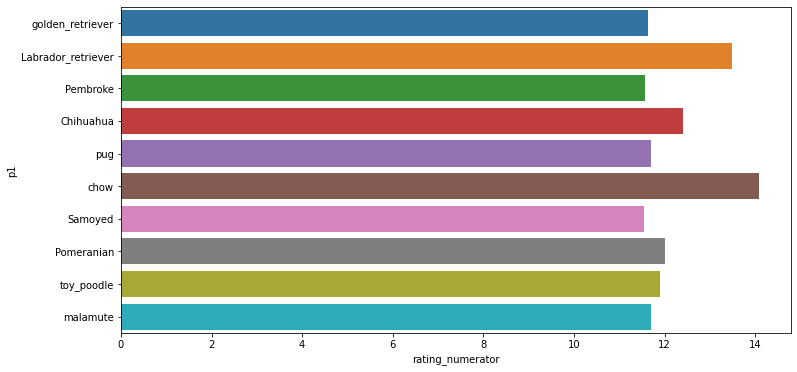

In [71]:
plt.figure(figsize=(12,6))
sns.barplot(y= p['p1'], x=p['rating_numerator'],order=  Merged_data_final['p1'].value_counts()[:10].index)

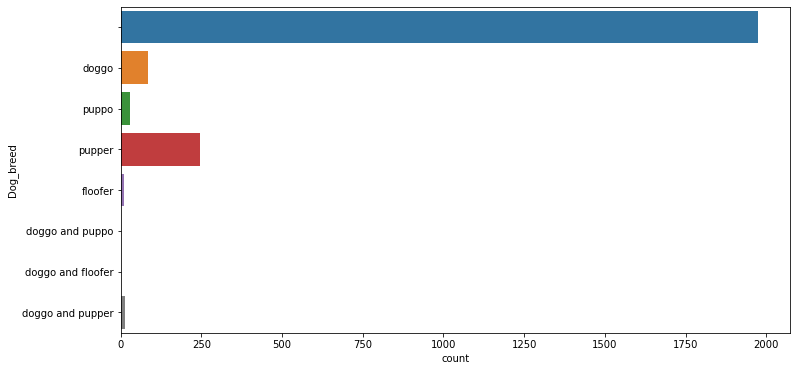

In [72]:
plt.figure(figsize=(12,6))
sns.countplot(y='Dog_breed',data=Merged_data_final)

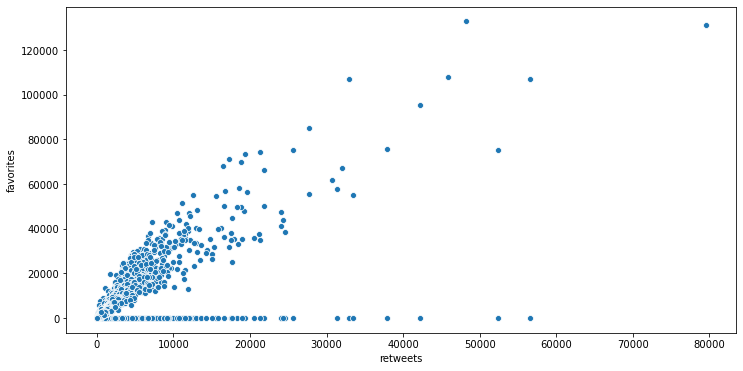

In [73]:
plt.figure(figsize=(12,6))
sns.scatterplot(y='favorites',x='retweets',data=Merged_data_final)

In [74]:
# Correcting the datatypes of retweets and favorites columns
Merged_data_final['retweets'] = Merged_data_final['retweets'].astype(float)

In [75]:
Merged_data_final['favorites'] = Merged_data_final['favorites'].astype(float)

In [76]:
q = Merged_data_final.groupby(['name'],as_index = False).mean()

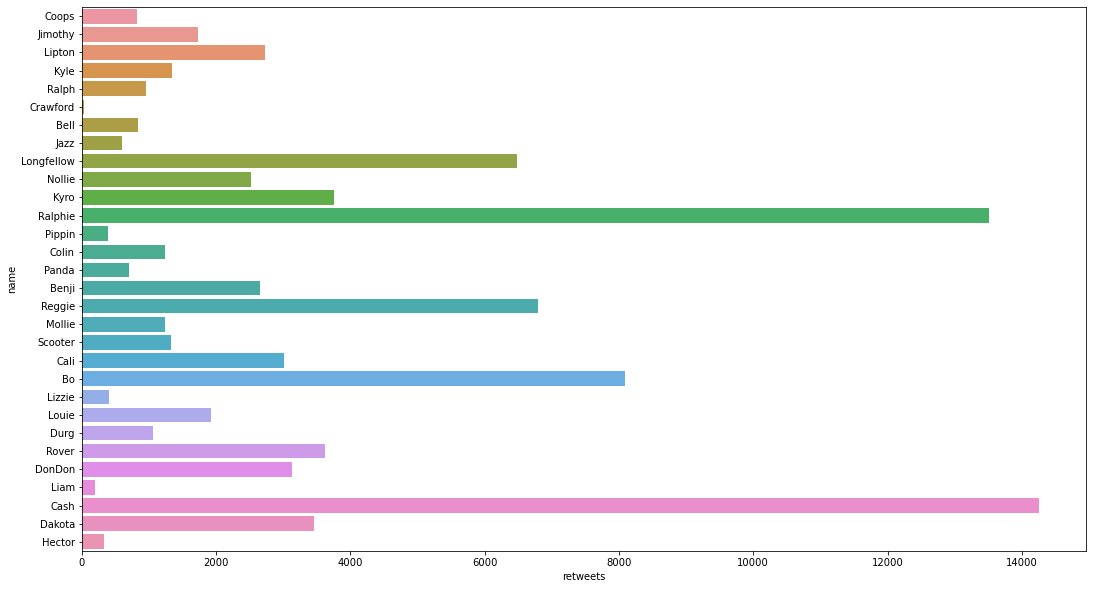

In [77]:
plt.figure(figsize = (18,10))
sns.barplot(y='name',x='retweets',data=q, order = q['name'].value_counts()[:30].index)

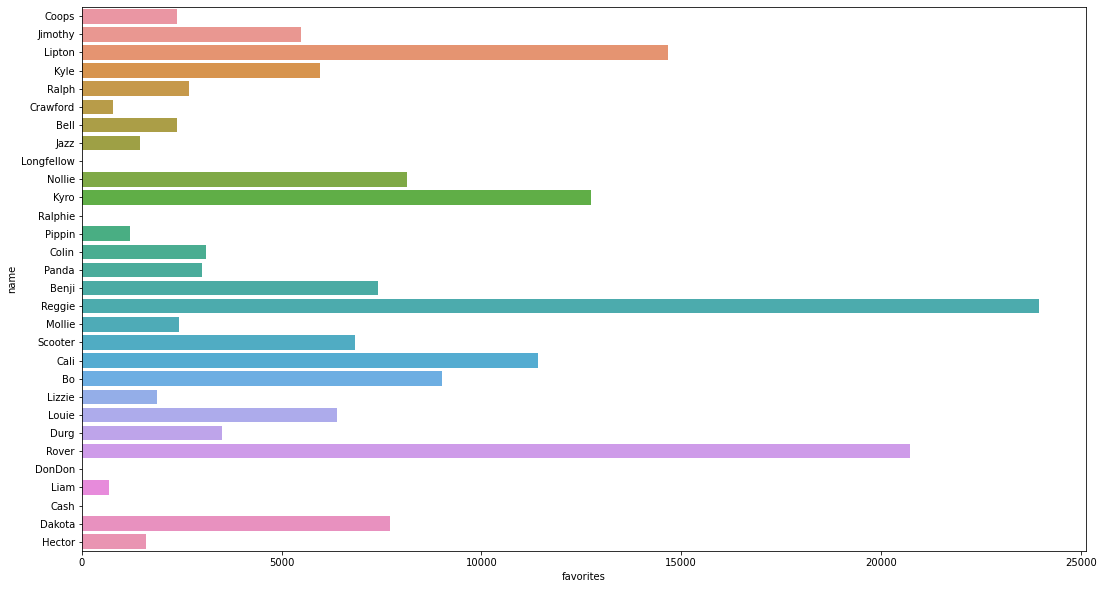

In [78]:
plt.figure(figsize = (18,10))
sns.barplot(y=q['name'],x=q['favorites'],order=q['name'].value_counts()[:30].index)

In [79]:
#END